# Python Homework 2

**Release date:** Thursday, October 26<br>
**Due date:** Wednesday, __November 8th  (!)__, at midnight via <font color="blue">Gradescope</font>

**Instruction:** Please upload your jupyter notebook on <font color="blue">Gradescope</font> with filename __PythonHW2_YOURPERMNUMBER.ipynb__.


Load some packages:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# LOAD MORE PACKAGES IF NEEDED

## Problem 1 (10 Points)

Consider the continuous-time __Registration Line Markov Chain__ from Example 2.13 (Lecture 7).

1. Implement a simulation of this Markov chain on the time interval $[0,60]$.

In [2]:
# Define the generator matrix (Q-matrix)
Qm = np.array([[-1/4, 1/4, 0, 0, 0],
               [1/5, -9/20, 1/4, 0, 0],
               [0, 1/5, -9/20, 1/4, 0],
               [0, 0, 1/5, -9/20, 1/4],
               [0, 0, 0, 1/5, -1/5]])

# Define the state space
ss = [0, 1, 2, 3, 4]

# Function to simulate the Markov chain

def sim_mc(Q, ss, s0, et):
    cs = s0
    ct = 0
    ts = [] # List to store state and the time at which transition happens
    
    while ct < et:
        # Rates of leaving the current state
        lr = Q[cs]

        # The diagonal element is negative sum of the row
        rt = -lr[cs]

        # Generate the holding time
        ht = np.random.exponential(1/rt)

        # Update the current time
        ct += ht
        if ct >= et: break

        # Choose the next state (weighted by the transition rates)
        probs = np.abs(lr) / rt
        probs[cs] = 0.0
        ns = np.random.choice(ss, p=probs)
        ts.append((ct, ns))

        # Update the current state
        cs = ns
    return ts


2. Plot a trajectory of this Markov Chain on $[0,60]$ by using your code from 1.

<i>Hint:</i> You can use the <tt>plt.hlines()</tt> command to plot horizontal lines (check also the documentation online).

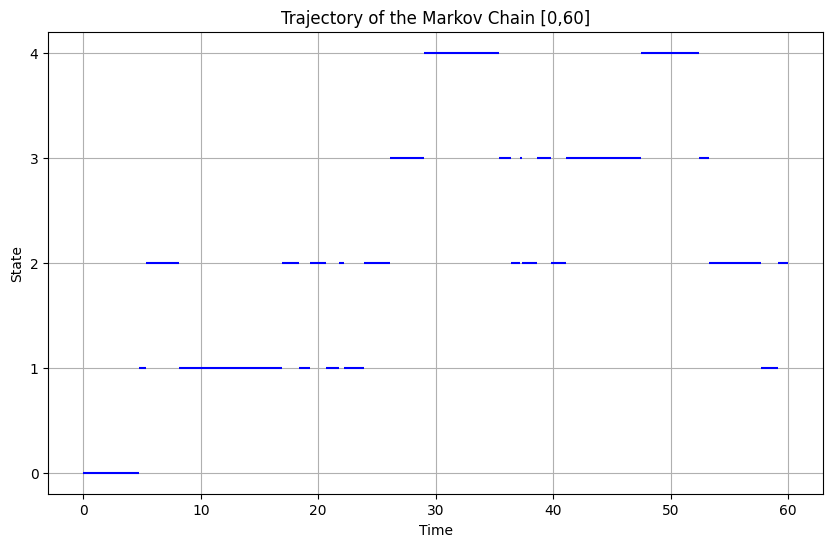

In [3]:
np.random.seed(123)

# Simulate a single Markov chain trajectory
trj = sim_mc(Qm, ss, 0, 60)

# Set up the plot
plt.figure(figsize=(10, 6))

# Initial state
cs, st = 0, 0

# Plot the horizontal lines for the trajectory
for tt, ns in trj:
    plt.hlines(cs, st, tt, colors='b')
    st, cs = tt, ns

# Plot the last segment until end_time
plt.hlines(cs, st, 60, colors='b')

# Set the y-axis ticks to correspond to the state space
plt.yticks(ss)

# Set labels and title
plt.xlabel('Time')
plt.ylabel('State')
plt.title('Trajectory of the Markov Chain [0,60]')

# Show grid and plot
plt.grid(True)
plt.show()

3. Compute the transition function $P(t)$ at $t = \pi$.

*Hint:* Use a suitable function from the <tt>scipy.linalg</tt> package (check also the documentation online).

In [4]:
from scipy.linalg import expm
t = np.pi
Pt = expm(Qm * t)
Pt

array([[0.55524989, 0.308565  , 0.10512926, 0.02554735, 0.00550851],
       [0.246852  , 0.3925013 , 0.24489947, 0.08909819, 0.02664905],
       [0.06728272, 0.19591958, 0.37967644, 0.24578083, 0.11134043],
       [0.01308024, 0.05702284, 0.19662467, 0.39747023, 0.33580202],
       [0.00225628, 0.01364431, 0.07125787, 0.26864162, 0.64419991]])

4. Compute the stationary distribution of this continuous-time Markov chain.

*Hint:* Use suitable functions from the <tt>numpy.linalg package</tt> (check also the documentation online).

In [5]:
# Modify the Q matrix to accommodate the constraint sum(pi) = 1
# We take the transpose of Q for the left side of the equations
Am = Qm.T
Am[-1, :] = 1  # This replaces the last row with ones for the constraint sum(pi_i) = 1

# Define b as a zero vector with a 1 at the end for the constraint equation
bm = np.zeros(len(Qm))
bm[-1] = 1  # This sets the last element to 1 for the constraint sum(pi_i) = 1

# Solve the system of equations A.T * pi = b
pi = np.linalg.solve(Am, bm) # This may raise a LinAlgError if A is singular
pi

array([0.12184674, 0.15230842, 0.19038553, 0.23798191, 0.29747739])

In [6]:
print(pi.dot(Qm)) # check the answer

[-3.46944695e-18  0.00000000e+00  1.38777878e-17 -1.38777878e-17
  1.00000000e+00]


## Problem 2 (10 Points)

Multistate Markov models are used in medicine to model the course of diseases. A patient may advance into, or recover from, successively more severe stages of a disease until some terminal state. Each stage represents a state of an absorbing continuous-time Markov chain.

Bartolomeo et al. (2011) develop such a model to study the progression of liver disease among patients diagnosed with cirrhosis of the liver. The general form of the infinitesimal generator matrix $Q$ for their three-parameter model is

$$ Q = \begin{pmatrix} -(q_{12} + q_{13}) & q_{12} & q_{13} \\ 0 & -q_{23} & q_{23} \\ 0 & 0 & 0 \end{pmatrix}  $$

where state 1 represents cirrhosis, state 2 denotes liver cancer, and state 3 is death.

1. Starting from the first stage ("cirrhosis"), estimate the mean time to death (i.e. ending up in stage 3) by running 100,000 simulations. Use the transition rates

$$ q_{12} = 0.0151, \quad q_{13} = 0.0071, \quad q_{23} = 0.0284.$$

In [7]:
from pickle import TRUE
np.random.seed(1234)
n = 100000

sl = np.zeros(n)
init = 1 # initial state of liver cirrhosis
q12, q13, q23 = 0.0151, 0.0071, 0.0284

for i in range(n):
    s, t = init, 0
    while True:
        if s == 1:
            tt12 = np.random.exponential(1/q12)
            tt13 = np.random.exponential(1/q13)
            if tt12 < tt13:
                t += tt12
                s = 2
            else:
                t += tt13
                break
          
        if s == 2:
            tt23 = np.random.exponential(1/q23)
            t += tt23
            break

    sl[i] = t

mean_ttd = np.mean(sl)
print(mean_ttd)

68.94944715958626


2. Compare your approximation from 1. with the exact theoretical mean time to death (implement a suitable formula from class).  

In [8]:
# Generator matrix Q
Qm = np.array([[-(q12 + q13), q12, q13],
               [0, -q23, q23],
               [0, 0, 0]])

Fm = -np.linalg.inv(Qm[:2, :2])

# Calculate the mean time to absorption from state 1
ttd_theory = np.sum(Fm[0, :])
print(ttd_theory)

68.99505138941758
